In [1]:
import numpy as np
import pandas as pd

# 一、缺失值处理

In [2]:
movies = pd.read_csv('./day4资料/02-代码/IMDB/IMDB-Movie-Data.csv')
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## 1、处理NaN

### 1.1 判断是否有NaN

In [3]:
np.any(pd.isnull(movies)) # 判断是否有缺失值，只要有一个True就True
# np.all(pd.notnull(movies)) # 判断是否有缺失值，只要有一个False就False

np.True_

In [4]:
pd.isnull(movies).any() # 判断更简单

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool

### 1.2 处理

方法1：删除含有缺失值的样本

In [5]:
data1 = movies.dropna()
data1.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [6]:
pd.isnull(data1).any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)    False
Metascore             False
dtype: bool

方法2：替换

*一般用平均值替换缺失值*

In [7]:
# 含缺失值列：
# Revenue (Millions)     True
# Metascore              True

movies['Revenue (Millions)'] = movies['Revenue (Millions)'].fillna(movies['Revenue (Millions)'].mean())
movies['Metascore'] = movies['Metascore'].fillna(movies['Metascore'].mean())
pd.isnull(movies).any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)    False
Metascore             False
dtype: bool

## 2、处理非NaN缺失值

In [8]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
name = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

data = pd.read_csv(path, names=name)
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
data_new = data.replace(to_replace='?', value=np.nan)
data_new.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


*后续再处理 NaN*

# 二、数据离散化

In [10]:
data = pd.Series([165,174,160,180,159,163,192,184], index=['No1:165', 'No2:174','No3:160', 'No4:180', 'No5:159', 'No6:163', 'No7:192', 'No8:184']) 
data

No1:165    165
No2:174    174
No3:160    160
No4:180    180
No5:159    159
No6:163    163
No7:192    192
No8:184    184
dtype: int64

## 1、自动分组转独热编码

In [11]:
sr = pd.qcut(data, 3)
sr

No1:165      (163.667, 178.0]
No2:174      (163.667, 178.0]
No3:160    (158.999, 163.667]
No4:180        (178.0, 192.0]
No5:159    (158.999, 163.667]
No6:163    (158.999, 163.667]
No7:192        (178.0, 192.0]
No8:184        (178.0, 192.0]
dtype: category
Categories (3, interval[float64, right]): [(158.999, 163.667] < (163.667, 178.0] < (178.0, 192.0]]

In [12]:
sr.value_counts()

(158.999, 163.667]    3
(178.0, 192.0]        3
(163.667, 178.0]      2
Name: count, dtype: int64

In [13]:
pd.get_dummies(sr, prefix="height", dtype=int) # 加 dtype=int 显示0、1

,"height_(158.999, 163.667]","height_(163.667, 178.0]","height_(178.0, 192.0]"
No1:165,0,1,0
No2:174,0,1,0
No3:160,1,0,0
No4:180,0,0,1
No5:159,1,0,0
No6:163,1,0,0
No7:192,0,0,1
No8:184,0,0,1


## 2、自定义分组转独热编码

In [14]:
bins = [150, 165, 180, 195] # 只用传边界
sr = pd.cut(data, bins=bins)
sr

No1:165    (150, 165]
No2:174    (165, 180]
No3:160    (150, 165]
No4:180    (165, 180]
No5:159    (150, 165]
No6:163    (150, 165]
No7:192    (180, 195]
No8:184    (180, 195]
dtype: category
Categories (3, interval[int64, right]): [(150, 165] < (165, 180] < (180, 195]]

In [15]:
pd.get_dummies(sr, prefix="height", dtype=int)

,"height_(150, 165]","height_(165, 180]","height_(180, 195]"
No1:165,1,0,0
No2:174,0,1,0
No3:160,1,0,0
No4:180,0,1,0
No5:159,1,0,0
No6:163,1,0,0
No7:192,0,0,1
No8:184,0,0,1


## 3、例子：股票涨跌幅离散化（p_change）

In [16]:
stock = pd.read_csv("./day4资料/02-代码/stock_day/stock_day.csv") 
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [17]:
p_change = stock['p_change']
p_change.head()

2018-02-27    2.68
2018-02-26    3.02
2018-02-23    2.42
2018-02-22    1.64
2018-02-14    2.05
Name: p_change, dtype: float64

In [18]:
sr1 = pd.qcut(p_change, 10) # 自动分组
sr1.value_counts()

p_change
(-10.030999999999999, -4.836]    65
(0.26, 0.94]                     65
(5.27, 10.03]                    65
(-0.462, 0.26]                   65
(-4.836, -2.444]                 64
(-1.352, -0.462]                 64
(-2.444, -1.352]                 64
(1.738, 2.938]                   64
(2.938, 5.27]                    64
(0.94, 1.738]                    63
Name: count, dtype: int64

In [19]:
pd.get_dummies(sr1, prefix="涨跌幅_", dtype=int).head()

,"涨跌幅__(-10.030999999999999, -4.836]","涨跌幅__(-4.836, -2.444]","涨跌幅__(-2.444, -1.352]","涨跌幅__(-1.352, -0.462]","涨跌幅__(-0.462, 0.26]","涨跌幅__(0.26, 0.94]","涨跌幅__(0.94, 1.738]","涨跌幅__(1.738, 2.938]","涨跌幅__(2.938, 5.27]","涨跌幅__(5.27, 10.03]"
2018-02-27,0,0,0,0,0,0,0,1,0,0
2018-02-26,0,0,0,0,0,0,0,0,1,0
2018-02-23,0,0,0,0,0,0,0,1,0,0
2018-02-22,0,0,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,0,0,0,1,0,0


In [20]:
bins = [-100, -7, -5, -3, 0, 3, 5, 7, 100]
sr2 = pd.cut(p_change, bins=bins) # 自定义分组
sr2

2018-02-27      (0, 3]
2018-02-26      (3, 5]
2018-02-23      (0, 3]
2018-02-22      (0, 3]
2018-02-14      (0, 3]
                ...   
2015-03-06    (7, 100]
2015-03-05      (0, 3]
2015-03-04      (0, 3]
2015-03-03      (0, 3]
2015-03-02      (0, 3]
Name: p_change, Length: 643, dtype: category
Categories (8, interval[int64, right]): [(-100, -7] < (-7, -5] < (-5, -3] < (-3, 0] < (0, 3] < (3, 5] < (5, 7] < (7, 100]]

In [21]:
stock_change = pd.get_dummies(sr2, prefix="涨跌幅", dtype=int)
stock_change.head()

,"涨跌幅_(-100, -7]","涨跌幅_(-7, -5]","涨跌幅_(-5, -3]","涨跌幅_(-3, 0]","涨跌幅_(0, 3]","涨跌幅_(3, 5]","涨跌幅_(5, 7]","涨跌幅_(7, 100]"
2018-02-27,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,1,0,0,0


# 三、合并

## 1、按方向合并

In [22]:
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [23]:
stock_change.head()

,"涨跌幅_(-100, -7]","涨跌幅_(-7, -5]","涨跌幅_(-5, -3]","涨跌幅_(-3, 0]","涨跌幅_(0, 3]","涨跌幅_(3, 5]","涨跌幅_(5, 7]","涨跌幅_(7, 100]"
2018-02-27,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,1,0,0,0


In [ ]:
pd.concat([stock, stock_change], axis=1).head() # 水平拼接

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,v_ma20,turnover,"涨跌幅_(-100, -7]","涨跌幅_(-7, -5]","涨跌幅_(-5, -3]","涨跌幅_(-3, 0]","涨跌幅_(0, 3]","涨跌幅_(3, 5]","涨跌幅_(5, 7]","涨跌幅_(7, 100]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,...,55576.11,2.39,0,0,0,0,1,0,0,0
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,...,56007.50,1.53,0,0,0,0,0,1,0,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,...,56372.85,1.32,0,0,0,0,1,0,0,0
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,...,60149.60,0.90,0,0,0,0,1,0,0,0
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,...,61716.11,0.58,0,0,0,0,1,0,0,0


In [27]:
pd.concat([stock, stock_change], axis=0) # 如果是竖直拼接会出现↓

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,v_ma20,turnover,"涨跌幅_(-100, -7]","涨跌幅_(-7, -5]","涨跌幅_(-5, -3]","涨跌幅_(-3, 0]","涨跌幅_(0, 3]","涨跌幅_(3, 5]","涨跌幅_(5, 7]","涨跌幅_(7, 100]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,...,55576.11,2.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,...,56007.50,1.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,...,56372.85,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,...,60149.60,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,...,61716.11,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 2、按索引合并

In [28]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [29]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [30]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [31]:
pd.merge(left, right, how='inner', on=['key1', 'key2']) # 默认inner内连接，只保留共有键的值再连接

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [32]:
pd.merge(left, right, how='outer', on=['key1', 'key2']) # 外连接：保留所有健的值连接，碰到不共有的键补NaN

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K0,NaN,NaN,C3,D3
5,K2,K1,A3,B3,NaN,NaN


In [33]:
pd.merge(left, right, how='left', on=['key1', 'key2']) # 左连接：保留左表的键连接（右连接类似），碰到不共有的键补NaN

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


# 四、交叉表与透视表

## 1、交叉表

In [36]:
stock.index

Index(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22', '2018-02-14',
       '2018-02-13', '2018-02-12', '2018-02-09', '2018-02-08', '2018-02-07',
       ...
       '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10', '2015-03-09',
       '2015-03-06', '2015-03-05', '2015-03-04', '2015-03-03', '2015-03-02'],
      dtype='object', length=643)

In [37]:
# pandas日期类型

date = pd.to_datetime(stock.index)
date

DatetimeIndex(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22',
               '2018-02-14', '2018-02-13', '2018-02-12', '2018-02-09',
               '2018-02-08', '2018-02-07',
               ...
               '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10',
               '2015-03-09', '2015-03-06', '2015-03-05', '2015-03-04',
               '2015-03-03', '2015-03-02'],
              dtype='datetime64[ns]', length=643, freq=None)

In [38]:
date.year

Index([2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       ...
       2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
      dtype='int32', length=643)

In [39]:
date.weekday # 数字+1表示星期几

Index([1, 0, 4, 3, 2, 1, 0, 4, 3, 2,
       ...
       4, 3, 2, 1, 0, 4, 3, 2, 1, 0],
      dtype='int32', length=643)

In [41]:
stock['week'] = date.weekday # 准备星期数据列
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2


In [ ]:
change_posi = np.where(stock['p_change'] > 0, 1, 0) # 判断stock['p_change']的每一个值如果>0，则将数据变为1，否则变为0
stock['change_posi'] = change_posi # 准备涨跌幅数据列

In [45]:
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week,change_posi
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,1
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2,1


In [47]:
my_crosstab1 = pd.crosstab(stock['week'], stock['change_posi']) # 交叉表，数字为频数
my_crosstab1

change_posi,0,1
week,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [49]:
my_crosstab2 = my_crosstab1.div(my_crosstab1.sum(axis=1), axis=0) # 数字为频率
my_crosstab2

change_posi,0,1
week,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


<Axes: xlabel='week'>

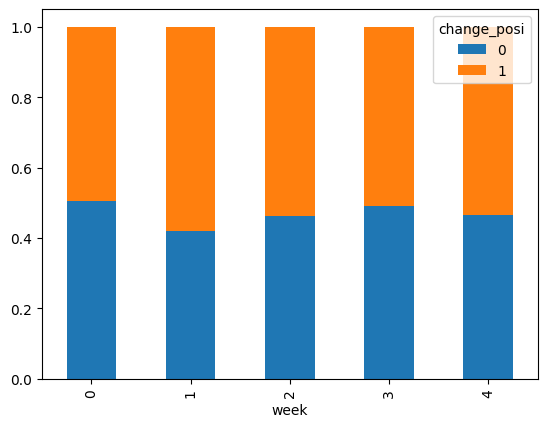

In [53]:
my_crosstab2.plot(kind='bar', stacked=True)

## 2、透视表

In [54]:
stock.pivot_table(['change_posi'], index=['week']) # 直接得出 change_posi=1 的频率

,change_posi
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


# 五、分组与聚合

In [3]:
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [5]:
# 对颜色分组，price1进行聚合

# col.groupby(by='color') # 分组，还需聚合才能显示
col.groupby(by='color')['price1'].max()

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64

In [6]:
col['price1'].groupby(by=col['color']).max()

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64

## 案例：星巴克零售店铺数据

In [7]:
starbucks = pd.read_csv('./day4资料/02-代码/directory.csv')
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [10]:
# 按照国家分组，求出每个国家的星巴克零售店数量

starbucks.groupby(by='Country').count()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Postcode,Phone Number,Timezone,Longitude,Latitude
Country,,,,,,,,,,,,
AD,1,1,1,1,1,1,1,1,1,1,1,1
AE,144,144,144,144,144,144,144,24,78,144,144,144
AR,108,108,108,108,108,108,108,100,29,108,108,108
AT,18,18,18,18,18,18,18,18,17,18,18,18
AU,22,22,22,22,22,22,22,22,0,22,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...
TT,3,3,3,3,3,3,3,3,0,3,3,3
TW,394,394,394,394,394,394,394,365,39,394,394,394
US,13608,13608,13608,13608,13608,13608,13608,13607,13122,13608,13608,13608


<Axes: xlabel='Country'>

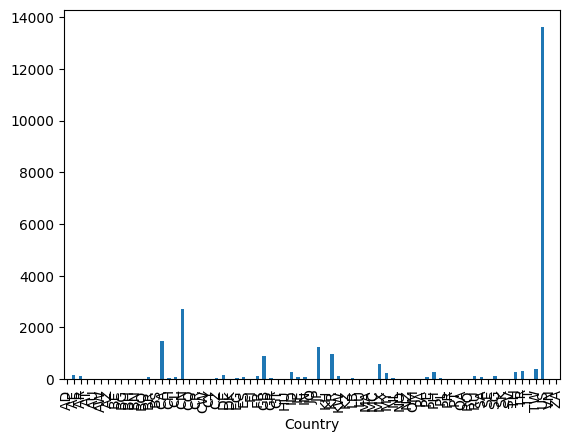

In [12]:
starbucks.groupby(by='Country').count()['Brand'].plot(kind='bar')

<Axes: xlabel='Country'>

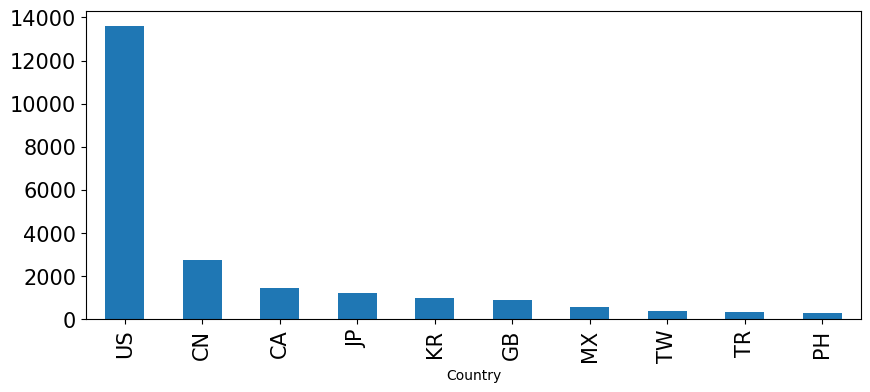

In [23]:
starbucks.groupby(by='Country').count()['Brand'].sort_values(ascending=False)[:10].plot(kind='bar', figsize=(10, 4), fontsize=15) # 美化一下

In [25]:
starbucks.groupby(by=['Country', 'State/Province']).count() # 根据两列分组，得到多索引的DataFrame

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
...                       ...           ...         ...             ...   
US      WV                 25            25          25              25   
        WY                 23            23          23              23   
VN      HN                  6             6           6               6   
        SG                 19            19          19              19   
ZA      GT                  3             3           3               3   

                        Street Address  City  Postcode  Phone Number  \
Country State/Province                                                 
AD      7                            1     1         1             1   
AE      AJ                           2     2         0             0   
        AZ                          48    48         7            20   
        DU                          82    82        16            50   
        FU                           2     2         1             0   
...                                ...   ...       ...           ...   
US      WV                          25    25        25            23   
        WY                          23    23        23            22   
VN      HN                           6     6         6             6   
        SG                          19    19        19            17   
ZA      GT                           3     3         3             2   

                        Timezone  Longitude  Latitude  
Country State/Province                                 
AD      7                      1          1         1  
AE      AJ                     2          2         2  
        AZ                    48         48        48  
        DU                    82         82        82  
        FU                     2          2         2  
...                          ...        ...       ...  
US      WV                    25         25        25  
        WY                    23         23        23  
VN      HN                     6          6         6  
        SG                    19         19        19  
ZA      GT                     3          3         3  

[545 rows x 11 columns]